# Análise de dados das ocorrências do Coronavírus

In [21]:
#Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,7)

In [22]:
base = pd.read_csv('csv/covid_19_data.csv')
base

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
7009,7010,03/19/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
7010,7011,03/19/2020,NaN,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0
7011,7012,03/19/2020,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0
7012,7013,03/19/2020,NaN,The Bahamas,2020-03-19T12:13:38,0.0,0.0,0.0


## Estatística Descritiva

In [24]:
#Descrição dos dados com a quantidade, a média, os quartis, desvo padrão, mínimo e máximo.
base.describe()

,SNo,Confirmed,Deaths,Recovered
count,7014.000000,7014.000000,7014.000000,7014.000000
mean,3507.500000,610.771600,20.435985,229.031651
std,2024.911726,4900.347776,208.405489,2596.500304
min,1.000000,0.000000,0.000000,0.000000
25%,1754.250000,2.000000,0.000000,0.000000
50%,3507.500000,13.000000,0.000000,0.000000
75%,5260.750000,112.750000,1.000000,10.000000
max,7014.000000,67800.000000,3405.000000,57682.000000


In [25]:
base['ObservationDate'] = pd.to_datetime(base.ObservationDate)
base['ObservationDate']

0      2020-01-22
1      2020-01-22
2      2020-01-22
3      2020-01-22
4      2020-01-22
          ...    
7009   2020-03-19
7010   2020-03-19
7011   2020-03-19
7012   2020-03-19
7013   2020-03-19
Name: ObservationDate, Length: 7014, dtype: datetime64[ns]

In [26]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7014 entries, 0 to 7013
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SNo              7014 non-null   int64         
 1   ObservationDate  7014 non-null   datetime64[ns]
 2   Province/State   4089 non-null   object        
 3   Country/Region   7014 non-null   object        
 4   Last Update      7014 non-null   object        
 5   Confirmed        7014 non-null   float64       
 6   Deaths           7014 non-null   float64       
 7   Recovered        7014 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 438.5+ KB


## Gráfico de Confirmados, Recuperados e Mortes

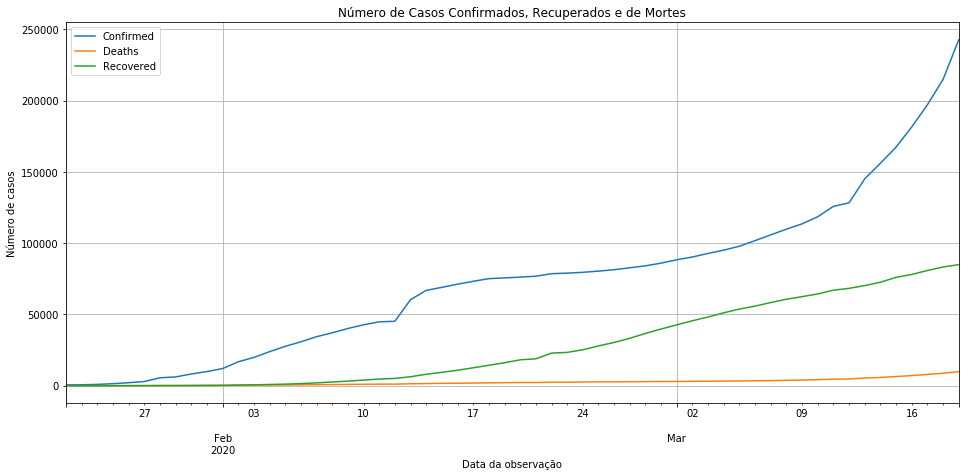

In [27]:
# Gráfico do Número de Casos Confirmados, Recuperados e de Mortes pela data de observação, todas as regiões foram somadas.

base.groupby(['ObservationDate'])['Confirmed'].sum().plot()
base.groupby(['ObservationDate'])['Deaths'].sum().plot()
base.groupby(['ObservationDate'])['Recovered'].sum().plot()
plt.title("Número de Casos Confirmados, Recuperados e de Mortes")
plt.xlabel("Data da observação")
plt.ylabel("Número de casos")
plt.legend()
plt.grid(True)

## Evolução de Casos Confirmados de Alguns Países

In [39]:
#Filtrando os dados
dados_br = base[(base['Country/Region'] == 'Brazil')]
dados_it = base[(base['Country/Region'] == 'Italy')]
dados_ge = base[(base['Country/Region'] == 'Germany')]
dados_fr = base[(base['Country/Region'] == 'France')]

### Itália, Alemanha e França

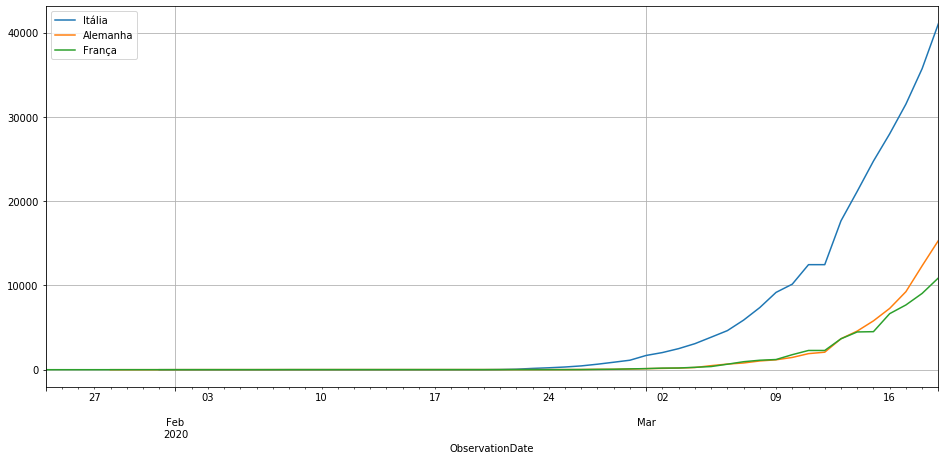

In [46]:
dados_it.groupby(['ObservationDate'])['Confirmed'].sum().plot(label='Itália')
dados_ge.groupby(['ObservationDate'])['Confirmed'].sum().plot(label='Alemanha')
dados_fr.groupby(['ObservationDate'])['Confirmed'].sum().plot(label='França')
plt.legend()
plt.grid(True)

### Brasil

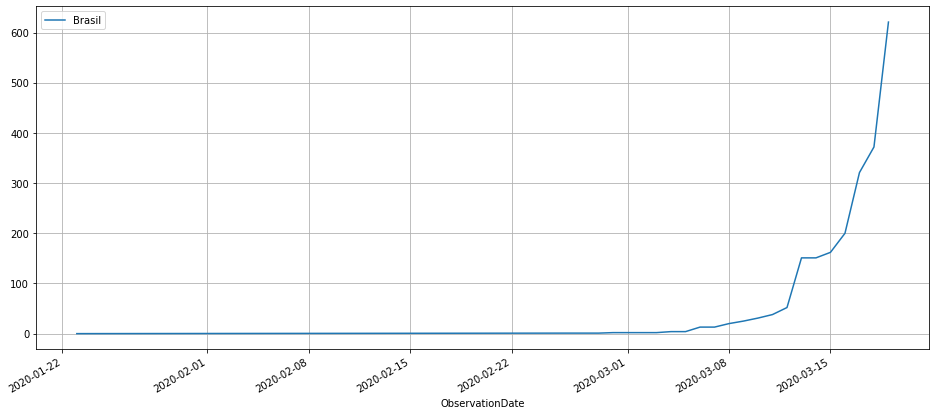

In [49]:
dados_br.groupby(['ObservationDate'])['Confirmed'].sum().plot(label='Brasil')
plt.legend()
plt.grid(True)